In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os
import seaborn as sns
import joblib
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
# !pip install eli5
# !pip install --upgrade eli5
# !pip install --upgrade scikit-learn
# import eli5
# from eli5.sklearn import PermutationImportance

In [2]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/e-nose for beef quality monitoring dataset.csv')

# Display basic dataset information
print("Dataset Overview:\n", data.info())
print("\nFirst 5 Rows:\n", data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   minute       4553 non-null   int64  
 1   class        4553 non-null   object 
 2   TVC          4553 non-null   float64
 3   MQ135        4553 non-null   float64
 4   MQ136        4553 non-null   float64
 5   MQ2          4553 non-null   float64
 6   MQ3          4553 non-null   float64
 7   MQ4          4553 non-null   float64
 8   MQ5          4553 non-null   float64
 9   MQ6          4553 non-null   float64
 10  MQ7          4553 non-null   float64
 11  MQ8          4553 non-null   float64
 12  MQ9          4553 non-null   float64
 13  Humidity     4553 non-null   float64
 14  Temperature  4553 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 533.7+ KB
Dataset Overview:
 None

First 5 Rows:
    minute  class       TVC  MQ135  MQ136    MQ2    MQ3    MQ4    MQ5   MQ6

In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/e-nose for beef quality monitoring dataset.csv')

# Display basic dataset information
print("Dataset Overview:\n", data.info())
print("\nFirst 5 Rows:\n", data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   minute       4553 non-null   int64  
 1   class        4553 non-null   object 
 2   TVC          4553 non-null   float64
 3   MQ135        4553 non-null   float64
 4   MQ136        4553 non-null   float64
 5   MQ2          4553 non-null   float64
 6   MQ3          4553 non-null   float64
 7   MQ4          4553 non-null   float64
 8   MQ5          4553 non-null   float64
 9   MQ6          4553 non-null   float64
 10  MQ7          4553 non-null   float64
 11  MQ8          4553 non-null   float64
 12  MQ9          4553 non-null   float64
 13  Humidity     4553 non-null   float64
 14  Temperature  4553 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 533.7+ KB
Dataset Overview:
 None

First 5 Rows:
    minute  class       TVC  MQ135  MQ136    MQ2    MQ3    MQ4    MQ5   MQ6

In [5]:
# Separate features and target
X = data.drop(columns=['minute','class','MQ136','MQ5','MQ3','MQ4','MQ8'])
y = data['class']

In [6]:
# Encode the Target Variable
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()

In [7]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [10]:
# One-hot encode y_train and y_test
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)

In [11]:
# Get the number of unique classes in y_train
num_classes = len(np.unique(y_train_encoded))

# Build Neural Network Model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9264 - loss: 0.2797 - val_accuracy: 0.9931 - val_loss: 0.0143
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9929 - loss: 0.0183 - val_accuracy: 0.9959 - val_loss: 0.0102
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9946 - loss: 0.0144 - val_accuracy: 0.9945 - val_loss: 0.0090
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0132 - val_accuracy: 0.9959 - val_loss: 0.0074
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0106 - val_accuracy: 0.9959 - val_loss: 0.0091
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9974 - loss: 0.0052 - val_accuracy: 0.9973 - val_loss: 0.0077
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0086 - val_accuracy: 0.9986 - val_loss: 0.0047
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9942 - loss: 0.0140 - val_accuracy: 0.9986 - val_loss

In [14]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


In [15]:
# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [16]:
# Classification Report
print(classification_report(y_test_labels, y_pred, target_names=encoder.categories_[0]))

              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00       136
     spoiled       1.00      1.00      1.00       775

    accuracy                           1.00       911
   macro avg       1.00      1.00      1.00       911
weighted avg       1.00      1.00      1.00       911



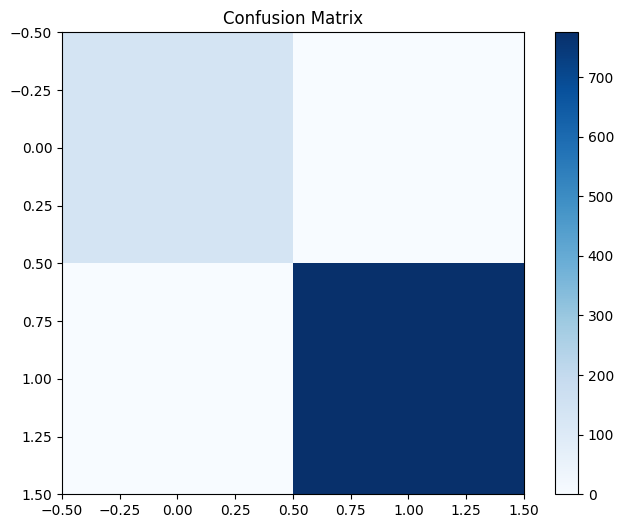

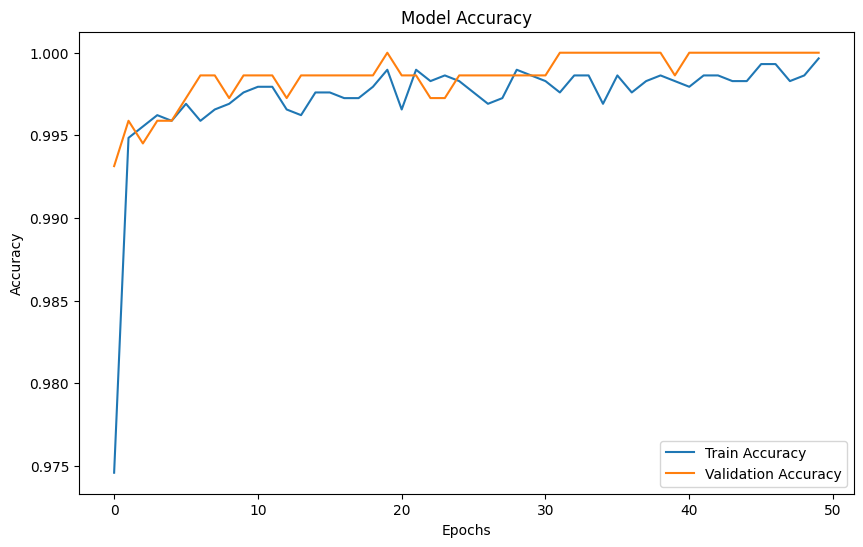

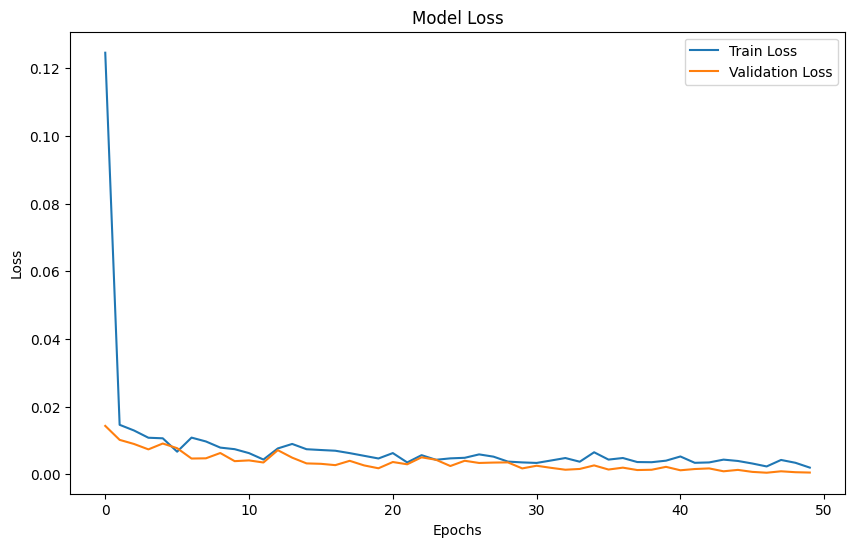

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

# Training History Plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
import os
save_dir = r'/content/drive/MyDrive/Colab Notebooks'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_path = os.path.join(save_dir, 'NN_model.pkl')

# Save the trained model
joblib.dump(model, file_path)
print(f"\nModel saved at: {file_path}")


Model saved at: /content/drive/MyDrive/Colab Notebooks/NN_model.pkl


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


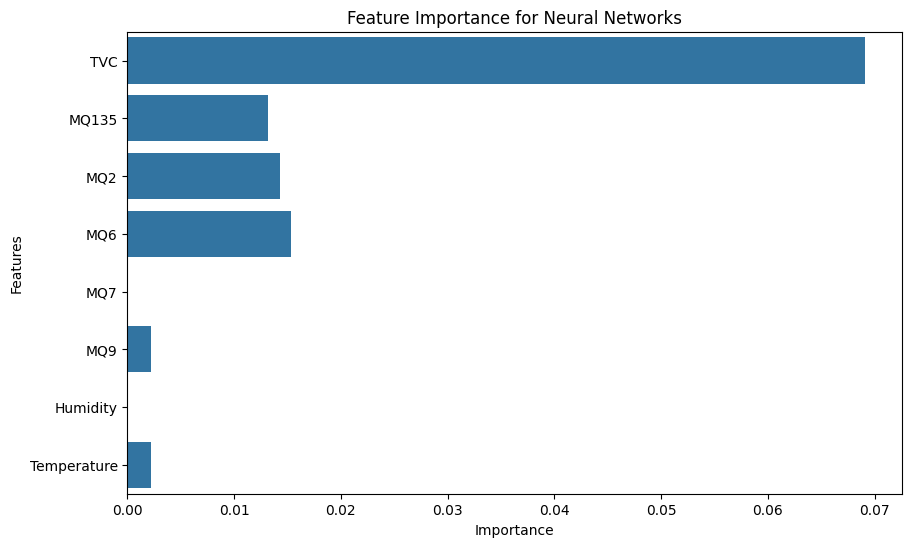

In [25]:
# Step 2: Feature Importance (For tree-based models)
def calculate_feature_importance(model, X_test, y_test_encoded):
    """Calculates feature importance using occlusion method."""

    num_features = X_test.shape[1]
    feature_importances = np.zeros(num_features)

    original_predictions = np.argmax(model.predict(X_test), axis=1)
    original_accuracy = np.mean(original_predictions == y_test_encoded)

    for i in range(num_features):
        X_test_occluded = X_test.copy()
        X_test_occluded[:, i] = 0  # Occlude the feature by setting it to 0

        occluded_predictions = np.argmax(model.predict(X_test_occluded), axis=1)
        occluded_accuracy = np.mean(occluded_predictions == y_test_encoded)

        feature_importances[i] = original_accuracy - occluded_accuracy  # Importance is the drop in accuracy

    return feature_importances

feature_importances_nn = calculate_feature_importance(model, X_test, y_test_encoded)
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_nn, y=features)
plt.title("Feature Importance for Neural Networks")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
